## To get this to run:

- Download PyKE: https://sourceforge.net/projects/pyke/
- Unzip folder in project
- cd pyke-1.1.1
- run python setup.py build
- run setup.py install

In [2]:
# GPT: FOL with pyke

from pyke import knowledge_engine

def is_fol_formula(formula_str):
    try:
        engine = knowledge_engine.engine(__file__)
        engine.activate('logic.krb')
        
        # Check if the parsed formula is a valid FOL formula
        return engine.prove_1('logic.parse', formula_str)
    except Exception as e:
        # If parsing or evaluation fails, it's not a valid FOL formula
        return False

# Test cases
formula1 = '∃x (Created(x, y) ∧ Repo(y) ∧ (Human(x) ∨ Alien(x)))'
formula2 = '∃x (Created(x, y) ∧ Repo(y) ∧ (Human(x) ∨ Alien(x)))'
formula3 = '∀x P(x) ∨ Q(x)'
formula4 = '∀x (Human(x) → Mortal(x))'

print("Formula 1 is a valid FOL formula:", is_fol_formula(formula1))
print("Formula 2 is a valid FOL formula:", is_fol_formula(formula2))
print("Formula 3 is a valid FOL formula:", is_fol_formula(formula3))
print("Formula 4 is a valid FOL formula:", is_fol_formula(formula4))



Formula 1 is a valid FOL formula: False
Formula 2 is a valid FOL formula: False
Formula 3 is a valid FOL formula: False
Formula 4 is a valid FOL formula: False


In [27]:
from sympy import Symbol, Not, And, Or, Implies, parse_expr
from sympy.abc import A, B, C
from sympy.logic.boolalg import is_cnf

def is_fol_formula(formula_str):

    # Parse the formula string into a sympy expression
    formula = parse_expr(formula_str)
    print(formula)

    # Check if the parsed formula is a valid FOL formula
    return is_cnf(formula)
"""    except Exception as e:
        # If parsing or evaluation fails, it's not a valid FOL formula
        print('Exception')
        return False"""

# Test cases
formula1 = '(Created(x, y) & Repo(y) & (Human(x) | Alien(x)))'
formula2 = 'x & y'

is_fol_formula(formula1)
is_fol_formula(formula2)


TypeError: unsupported operand type(s) for &: 'Created' and 'Repo'

In [47]:
def is_horn_clause(formula):
    # Split the formula by logical OR (disjunction) into individual literals
    literals = formula.split('|')

    # Initialize counters for positive and negative literals
    positive_literals = 0
    negative_literals = 0

    for literal in literals:
        # Remove leading and trailing spaces
        literal = literal.strip()

        if literal.startswith('not '):
            # Negative literal
            negative_literals += 1
        else:
            # Positive literal
            positive_literals += 1

        # If there are more than one positive literal or a conjunction (AND), it's not a valid Horn clause
        if positive_literals > 1 or 'and' in literal or '⋀' in literal:
            return False

    # A valid Horn clause has at most one positive literal or none
    return True

# Test cases
formula1 = 'not createdBy(x, y) | not createdBy(y, x) | lives(t)'
formula2 = 'p and q'
formula3 = 'createdBy(x, y) | not createdBy(y, x)'

print(is_horn_clause(formula1))
print(is_horn_clause(formula2))
print(is_horn_clause(formula3))


True
False
True


## Fine... I'll do it myself

In [ ]:
# (∀y (Animal(y) → Loves(x, y))) ∧ (∃x ∃y (Animal(x) ∧ Animal(y) ∧ Loves(x, y) ∧ Hates(y, x)))

# [∀y (Animal(y) → Loves(x, y)), ∧, (∃x ∃y (Animal(x) ∧ Animal(y) ∧ Loves(x, y) ∧ Hates(y, x))]
# [∀y, [Animal(y), →, Loves(x, y)], ∧, [∃x∃y, (Animal(x), ∧, Animal(y), ∧, Loves(x, y), ∧, Hates(y, x)]]

In [1]:
# Bruke fol_parser fra logicllama??

from fol_parser import parse_text_FOL_to_tree

/opt/anaconda3/envs/logicllama/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
s = '∀x∀y((Person(x) ∧ CareAbout(y,x) ∧ ExpectsPerfectPerson(y,x)) → ¬evaluation(ok))'
tree = parse_text_FOL_to_tree(s)


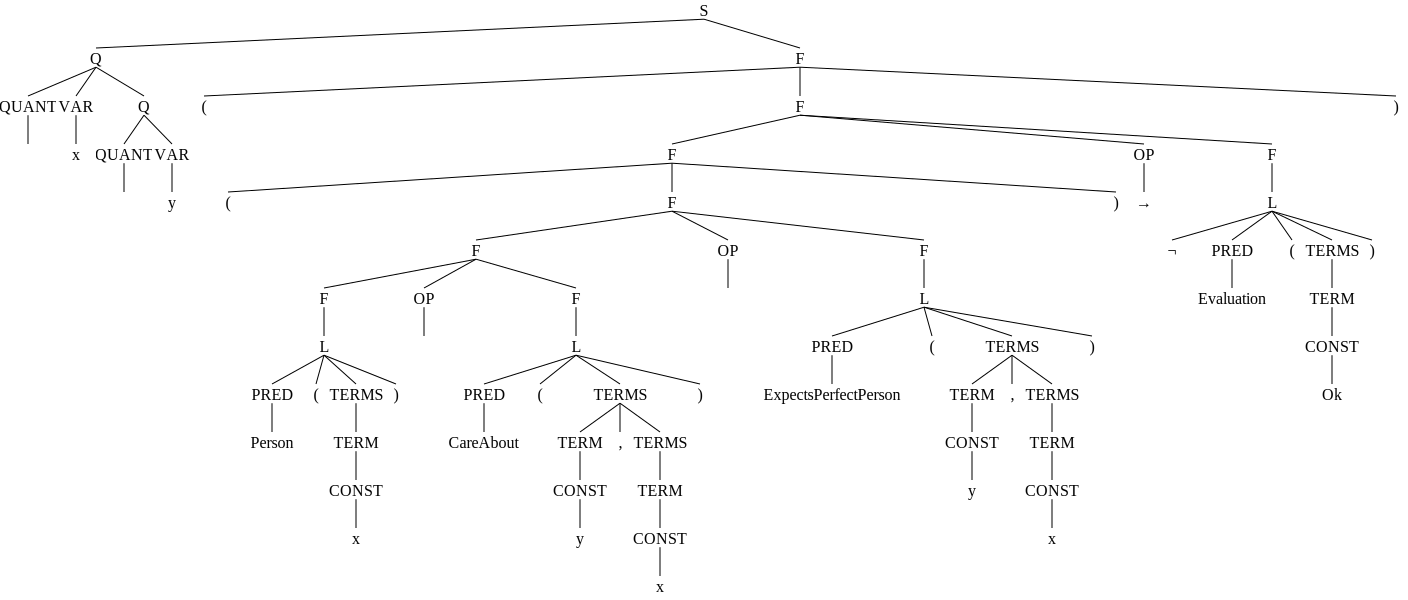

In [3]:
tree

In [73]:
from nltk import Tree

def traverse_tree(tree, is_subtree=False):
    for subtree in tree:
        print('Current tree:', subtree)
        if len(subtree) > 1:
            # Iterate through the depth of the subtree.
            #print('sub tree creation')
            traverse_tree(subtree, True)
            #print('end of sub tree creation')
        elif type(subtree) == str:
            print('son creation:', subtree)

traverse_tree(tree)

Current tree: (Q (QUANT ∀) (VAR x) (Q (QUANT ∀) (VAR y)))
Current tree: (QUANT ∀)
Current tree: ∀
son creation: ∀
Current tree: (VAR x)
Current tree: x
son creation: x
Current tree: (Q (QUANT ∀) (VAR y))
Current tree: (QUANT ∀)
Current tree: ∀
son creation: ∀
Current tree: (VAR y)
Current tree: y
son creation: y
Current tree: (F
  (
  (F
    (F
      (
      (F
        (F
          (F+L (PRED Person) ( (TERMS+TERM (CONST x)) ))
          (OP ∧)
          (F+L
            (PRED CareAbout)
            (
            (TERMS (TERM (CONST y)) , (TERMS+TERM (CONST x)))
            )))
        (OP ∧)
        (F+L
          (PRED ExpectsPerfectPerson)
          (
          (TERMS (TERM (CONST y)) , (TERMS+TERM (CONST x)))
          )))
      ))
    (OP →)
    (F (L ¬ (PRED Evaluation) ( (TERMS+TERM (CONST Ok)) ))))
  ))
Current tree: (
son creation: (
Current tree: (F
  (F
    (
    (F
      (F
        (F+L (PRED Person) ( (TERMS+TERM (CONST x)) ))
        (OP ∧)
        (F+L
          (PRED Ca

In [74]:
uncoll = tree.collapse_unary()

In [75]:
uncoll

In [78]:
tree_list = list(tree)
for branch in tree_list:
    print (branch)

(Q (QUANT ∀) (VAR x) (Q (QUANT ∀) (VAR y)))
(F
  (
  (F
    (F
      (
      (F
        (F
          (F+L (PRED Person) ( (TERMS+TERM (CONST x)) ))
          (OP ∧)
          (F+L
            (PRED CareAbout)
            (
            (TERMS (TERM (CONST y)) , (TERMS+TERM (CONST x)))
            )))
        (OP ∧)
        (F+L
          (PRED ExpectsPerfectPerson)
          (
          (TERMS (TERM (CONST y)) , (TERMS+TERM (CONST x)))
          )))
      ))
    (OP →)
    (F (L ¬ (PRED Evaluation) ( (TERMS+TERM (CONST Ok)) ))))
  ))


In [87]:
tree_list[1][2][0][0]

'∀'

In [21]:
def pretty_print(tree_list):
    new_list = []
    spaces = ')∨∧→↔'
    for word in tree_list:
        if word in spaces:
            new_list.append(word + ' ')
        else:
            new_list.append(word)
    return ''.join(new_list)

In [30]:
def traverse(tree):
    for subtree in tree:
        if type(subtree) == str:
            #print(f'i is string: {i}')
            continue 
        for j in range(len(subtree)):
            #print(i[j])
            if type(subtree[j]) == str:
                continue
            if subtree[j].label() == 'OP':
                #print('**************OP FOUND**************')
                pre = subtree[j-1].leaves()
                op = subtree[j].leaves()
                post = subtree[j+1].leaves()
                print(f'[{pretty_print(pre)}] [{pretty_print(op)}] [{pretty_print(post)}]')
                # for node in subtree:
                #     print(node[0].leaves())
        
        traverse(subtree)

In [31]:
traverse(tree)

[(Person(x) ∧ CareAbout(y,x) ∧ ExpectsPerfectPerson(y,x) ) ] [→ ] [¬Evaluation(Ok) ]
[Person(x) ∧ CareAbout(y,x) ] [∧ ] [ExpectsPerfectPerson(y,x) ]
[Person(x) ] [∧ ] [CareAbout(y,x) ]


<generator object Tree.subtrees at 0x7ff45cc56b50>

In [141]:
tree[1][1][2][0][3][0][0]

'Ok'

In [ ]:
# '∀x∀y((Person(x) ∧ CareAbout(y,x) ∧ ExpectsPerfectPerson(y,x)) → ¬evaluation(ok))'
# RES: [∀x∀y[[[Person(x) ∧ CareAbout(y,x)] ∧ ExpectsPerfectPerson(y,x)] → ¬evaluation(ok)]]

In [147]:
tree[1][1][1].label()

'OP'

In [6]:
tree.height()

13

In [5]:
print(rev_tree)

None


In [8]:
print((tree.leaves()))

['∀', 'x', '∀', 'y', '(', '(', 'Person', '(', 'x', ')', '∧', 'CareAbout', '(', 'y', ',', 'x', ')', '∧', 'ExpectsPerfectPerson', '(', 'y', ',', 'x', ')', ')', '→', '¬', 'Evaluation', '(', 'Ok', ')', ')']


## NY IDE: FJERNE QUANTIFIERS, OG DERETTER BRUKE SYMPY?

In [3]:
import pandas as pd
translated_df = pd.read_csv('translated_test.yes_no.tsv', sep='\t') 

In [4]:
translated_df

,num,input_sequence,fol_translation,horn_translation,comment
0,0,you should expect your friends to reveal every...,"∀x∀y(Friends(x, y) ∧ RevealEverything(x, y) → ...","¬Friends(x,y) ∨ ¬RevealEverything(x,y) ∨ evalu...",NaN
1,1,you should ask too much of your family.,"∀x∀y(Family(x,y) ∧ ShouldAskTooMuch(y,x) → eva...","¬Family(x,y) ∨ ¬ShouldAskTooMuch(y,x) ∨ evalua...",NaN
2,2,it's good to meet new people when you go shopp...,"∀x∀y(Shopping(x) ∧ Meets(x,y) ∧ New(y) → evalu...","¬Shopping(x) ∨ ¬Meets(x,y) ∨ ¬New(y) ∨ evlauat...",NaN
3,3,it's good to be excited about getting your fir...,"∀x∀y((Paycheck(x) ∧ Gets(y,x) → ExcitedAbout(y...","¬Paycheck(x) ∨ ¬Gets(y,x) ∨ ¬ExcitedAbout(y,x)...",NaN
4,4,you're expected to make sure food you serve to...,"∀x∀y∀z(IsFood(x) ∧ Serve(y,x,z) ∧ CheckSafety(...","¬IsFood(x) ∨ ¬Serve(y,x,z) ∨ ¬ExpectedToCheckS...",NaN
5,5,it's bad to take an advantage in life when you...,"∀x∀y(Advantage(x) ∧ See(y,x) ∧ Take(y,x) → eva...","¬Advantage(x) ∨ ¬See(y,x) ∨ ¬Take(t,x) ∨ evalu...",NaN
6,6,you shouldn't try to steal your friend's signi...,"∀x∀y∀z(Friend(y,x) ∧ SignificantOther(z,y) ∧ T...","¬Friend(y,x) ∨ ¬SignificantOther(z,y) ∨ ¬TryTo...",NaN
7,7,you shouldn't measure new furniture before buy...,"∀x∀y(Furniture(x) ∧ ¬Bought(y,x) ∧ Measure(y,x...","¬Furniture(x) ∨ Bought(y,x) ∨ Measure(y,x) ∨ e...",NaN
8,8,it's bad to get free driving lessons if you wa...,∀x(WantToLearnDriving(x) ∧ GetsFreeDrivingLess...,¬WantToLearnDriving(x) ∨ ¬GetsFreeDrivingLesso...,NaN
9,9,it's considered uncivilized to live in a van.,∀x(LivesInVan(x) → evaluation(UNCIVILIZED)),¬LivesInVan(x) ∨ evaluation(UNCIVILIZED),NaN


In [6]:
gpt_df = pd.read_csv('data/all_translations.tsv', sep='\t') 
gpt_df

,num,input_sequence,fol_translation,prompt_1-translations,prompt_1-evals,prompt_2-translations,prompt_2-evals,prompt_3-translations,prompt_3-evals,prompt_3_adjustment_prompt_1-translations,prompt_3_adjustment_prompt_1-evals,prompt_3_adjustment_prompt_1_adjustment_prompt_1-translations,prompt_3_adjustment_prompt_1_adjustment_prompt_1-evals,prompt_4-translations,prompt_4-evals,prompt_4_adjustment_prompt_2-translations,prompt_4_adjustment_prompt_2-evals
0,0,you should expect your friends to reveal every...,"∀x∀y(Friends(x, y) ∧ RevealEverything(x, y) → ...",∀x(Friend(x) → RevealEverything(x)),1,"∀x∀y(Friends(x, y) → ShouldExpect(x, RevealEve...",0,"∀x∀y(Friends(x, y) → ShouldRevealEverything(x,...",1,"∀x∀y(Friends(x, y) → ExpectRevealEverything(y,...",1,"∀x∀y(Friends(x, y) ∧ Yourself(y) → ExpectRevea...",1,"∀x∀y(Friend(x, y) → ExpectRevealEverything(x, y))",1,"∀x∀y(Friend(y, x) → ShouldExpect(y,RevealEvery...",0
1,1,you should ask too much of your family.,"∀x∀y(Family(x,y) ∧ ShouldAskTooMuch(y,x)) → ev...","Ask(you, tooMuch, family)",1,"∀x∀y(Family(y) ∧ Has(x, y) → ShouldAskTooMuch(x))",1,∀x(Family(x) → ShouldAskTooMuch(x)),1,"∀x(Family(y,x) ∧ ShouldAskTooMuch(y) → evaluat...",1,"∀x∀y(AskTooMuch(x, y) ∧ Family(x) → evaluation...",1,∀x(Family(x) → ShouldAskTooMuch(x)),1,"∀x∀y(Family(y) ∧ Member(x, y) → ShouldAskTooMu...",1
2,2,it's good to meet new people when you go shopp...,"∀x∀y(Shopping(x) ∧ Meets(x,y) ∧ New(y) → evalu...","∀x(Good(Meet(newPeople)) → Go(x, shopping))",0,"∀x∀y(Shopping(x) ∧ Meets(x,y) ∧ New(y) → evalu...",1,"∀x∀y(Shopping(x) ∧ MeetNewPeople(x,y) → Good(x))",1,"∀x∀y(GoShopping(x) ∧ MeetNewPeople(x,y) → eval...",1,∀x∀y((GoShopping(x) ∧ MeetNewPeople(y)) → eval...,1,"∀x∀y(GoShopping(x) ∧ MeetNewPeople(x, y) → eva...",1,"∀x∀y∀z(People(z) ∧ GoShopping(y) ∧ MeetNew(x,z...",1
3,3,it's good to be excited about getting your fir...,"∀x∀y((Paycheck(x) ∧ Gets(y,x) → ExcitedAbout(y...",GoodToBeExcited(getFirstPaycheck),1,∀x(FirstPaycheck(x) ∧ ExcitedAbout(x) → evalua...,1,∀x(FirstPaycheck(x) ∧ ExcitedAbout(x) → evalua...,1,∀x(FirstPaycheck(x) ∧ ExcitedAboutGetting(x) →...,1,"∀x(FirstPaycheck(y) ∧ ExcitedAboutGetting(x,y)...",1,∀x(FirstPaycheck(x) ∧ Excited(x) → evaluation(...,1,∀x(FirstPaycheck(x) ∧ ExcitedAboutGetting(x) →...,1
4,4,you're expected to make sure food you serve to...,"∀x∀y∀z(IsFood(x) ∧ Serve(y,x,z) → CheckSafety(...","∀x(Serve(you, x) → SafeToEat(x))",1,"∀x∀y(Serves(x, y) ∧ Food(y) → ExpectedToEnsure...",0,"∀x∀y(Serves(x,y) ∧ IsFood(y) → ShouldCheckSafe...",1,"∀x∀y((ServesFood(x,y) ∧ IsFood(y)) → ExpectedT...",1,"∀x∀y(ServesFood(x,y) → (IsFood(y) ∧ ExpectedTo...",1,"∀x∀y(Serves(x,y) ∧ Food(y) → EnsuresSafeToEat(...",1,"∀x∀y(Serves(x,y) ∧ Food(y) → EnsuresSafeToEat(...",1
5,5,it's bad to take an advantage in life when you...,"∀x∀y(Advantage(x) ∧ See(y,x) ∧ Take(y,x) → eva...",∀x (TakeAdvantage(x) → Bad(x)),1,"∀x∀y(Life(x) ∧ Sees(x,y) ∧ Advantage(y) → eval...",1,"∀x∀y((Sees(x,y) ∧ AdvantageInLife(y)) → evalua...",1,"∀x∀y(See(x,y) ∧ AdvantageInLife(y) ∧ Take(x,y)...",1,"∀x∀y(See(x,y) ∧ AdvantageInLife(y) ∧ Take(x,y)...",1,"∀x∀y(SeeAdvantage(x,y) ∧ TakeAdvantage(x,y) → ...",1,"∀x∀y(SeeAdvantage(y,x) ∧ TakeAdvantage(y,x) → ...",1
6,6,you shouldn't try to steal your friend's signi...,"∀x∀y∀z(Friend(y,x) ∧ SignificantOther(z,y) → ¬...","∀ x,y (Person(x) ∧ Person(y) ∧ Friends(x,y) → ...",0,"∀x∀y∀z(People(x) ∧ Friends(x, y) ∧ Significant...",1,"∀x∀y(Friend(x,y) ∧ SignificantOther(y) → ¬Shou...",1,"∀x∀y∀z((Friend(x,y) ∧ SignificantOther(y,z)) →...",1,"∀x∀y∀z((Friend(x,y) ∧ SignificantOther(y,z)) →...",1,"∀x∀y∀z(Friend(x,y) ∧ SignificantOther(y,z) → ¬...",1,"∀x∀y∀z(Friend(x,y) ∧ SignificantOther(y,z) → ¬...",1
7,7,you shouldn't measure new furniture before buy...,"∀x∀y(Furniture(x) ∧ ¬Bought(y,x) → ¬ShouldMeas...",¬MeasureBeforeBuying(newFurniture),1,∀x(Furniture(x) ∧ New(x) → ¬ShouldMeasureBefor...,1,∀x(NewFurniture(x) ∧ Buying(x) → ¬ShouldMeasur...,1,∀x(NewFurniture(x) ∧ Buying(x) → ¬MeasureBefor...,1,∀x(¬(NewFurnitu

In [7]:
gpt_df['fol_translation'] = translated_df['fol_translation']

In [9]:
gpt_df.to_csv('data/all_translations.tsv', sep='\t', index=False)

## Fix CNF vs CNF

In [2]:
s = "evaluation(EXPECTED) | ~StaysWith(C0, C1) & Person(C0) & Person(C1) & PlansOnMarrying(C0, C1)"

In [15]:
import pandas as pd

lst = [[s, 1]]
df = pd.DataFrame(lst, columns=["CNF-translations","CNF-evals"])
df

,CNF-translations,CNF-evals
0,"evaluation(EXPECTED) | ~StaysWith(C0, C1) & Pe...",1


In [16]:
def cnf_to_horn(df, cnf_col_name):
    """Converts a data frame of CNF formulas to Horn formulas.

    Args:
        df (DataFrame): The dataframe to iterate through
        horn_col_name (str): Name of the column to save the translations and evaluations to
        cnf_col_name (str): Name of the column to iterate through
    """
    
    cnf_formulas = list(df[f'{cnf_col_name}-translations'])
    cnf_evals = list(df[f'{cnf_col_name}-evals'])

    horn_formulas = []
    horn_evals = []

    for index in range(len(cnf_formulas)):
        if cnf_evals[index] == 1:
            try:
                antecedent = []
                consequence = []
                formula = cnf_formulas[index]
                formula_splt = formula.split('|')
                for predicate in formula_splt:
                    if predicate.strip()[0] != '~':
                        consequence.append(predicate.strip())
                    else:
                        i = predicate.replace('~', '¬')
                        antecedent.append(i.strip())

                if len(consequence) > 1:
                    horn_formulas.append('NOT HORN')
                    horn_evals.append(0)
                    print(f'CNF: {cnf_formulas[index]}\nHorn: Not Horn\n')
                else:
                    joined = (' ∨ ').join(antecedent)
                    if len(consequence) > 0:
                        joined = (' ∨ ').join([joined, consequence[0]])
                    #print(joined)
                    horn_formulas.append(joined)
                    horn_evals.append(1)
                    print(f'CNF: {cnf_formulas[index]}\nHorn: {joined}\n')
            except Exception as e:
                horn_formulas.append('ERROR')
                horn_evals.append(-1)
                print(f'CNF: {cnf_formulas[index]}\nHorn: {e}\n')
        else:
            horn_formulas.append('INVALID')
            horn_evals.append(0)
            print(f'INVALID\n')
    return df, horn_formulas, horn_evals

In [18]:
answ = cnf_to_horn(df, 'CNF')


CNF: evaluation(EXPECTED) | ~StaysWith(C0, C1) & Person(C0) & Person(C1) & PlansOnMarrying(C0, C1)
Horn: ¬StaysWith(C0, C1) & Person(C0) & Person(C1) & PlansOnMarrying(C0, C1) ∨ evaluation(EXPECTED)



In [25]:
def reformat_conjunctions(f):
    splitted_f = f.split('|')
    end = ""
    for i in splitted_f:
        new = "("+i.strip()+") | "
        end+=(new)
        if "&" in i:
            
    return end[:-3]

reformat_conjunctions(s)

'(evaluation(EXPECTED)) | (~StaysWith(C0, C1) & Person(C0) & Person(C1) & PlansOnMarrying(C0, C1))'